# QCTO - Workplace Module

### Project Title: PREDICTING HOUSE PRICES USING NEURAL NETWORKS
#### Done By: KGOMOTSO MAKOTO

© ExploreAI 2024

---
## Table of Contents
<a href=#BC> Background Context</a>
1.   Importing Libraries and Data Loading
2.   EDA - Data Cleaning.
3.   Outlier Removal
4.   Training and Testing
5.   Model Training, Machine Learning Regression
6.   Feature Engineering and Feature Importance
7.   Recommendations
8.   Neaural Network Regression using TensorFlow.
9.   Conclusion
10.  References


# **Background context**

### **Background Context**

The real estate market is a dynamic and complex sector where property prices are influenced by numerous factors, such as location, size, amenities, and market trends. Accurately predicting house prices is critical for buyers, sellers, and investors to make informed decisions. Traditional valuation methods often rely on subjective analysis or simpler statistical techniques that may not capture non-linear patterns in data. 

With the advancements in machine learning, particularly neural networks, there is an opportunity to develop predictive models capable of analyzing complex relationships within housing data. This project leverages historical housing data and neural network algorithms to create a robust and scalable model for predicting house prices, enabling data-driven decision-making in the real estate industry.

# **OBJECTIVE**
1.   Project Objectives
2.   Build a clean and well-structured housing dataset.
3.   Develop a robust neural network model for price prediction.
4.   Evaluate the model’s performance using relevant metrics (MAE, MSE).
6.   Visualize model results to assess its effectiveness.
7.   Document the process and results for future scalability.
 
AIM:
1) Develop robust house price prediction models. These models, by considering a multitude of variables including property features, economic indicators, and market trends, aim to provide accurate predictions aligned closely with actual sales prices

# **Table of Contents**


1.   Importing Libraries and Data Loading
2.   EDA - Data Cleaning.
3.   Outlier Removal
4.   Training and Testing
5.   Model Training, Machine Learning Regression
6.   Feature Engineering and Feature Importance
7.   Recommendations
8.   Neaural Network Regression using TensorFlow.
9.   Conclusion






# **Importing packages**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

# **Loading Data**

In [ ]:
#reading the dataset

df = pd.read_csv('/content/train(1).csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#checking the shape

df.shape

(1460, 81)

# Data Cleaning and Exploration

In [ ]:
# checking duplicates

df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# check the dataframe for the entire for null data

null_data = df[df.isnull().any(axis=1)]
null_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# Checking NaN data
data_nan_per_column = df.isna().sum()
data_nan_total = df.isna().sum().sum()

print("NaN data per column:")
print(data_nan_per_column)
print("\nTotal NaN data in DataFrame:", data_nan_total)



NaN data per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Total NaN data in DataFrame: 7829


In [ ]:
# Check columns with NaN values
columns_with_nan = df.columns[df.isnull().any()]

# Show columns with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [ ]:
# Checking for missing data
data_missing = df.isnull()

print("Missing data by column:")
data_missing

Missing data by column:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
#drop null values

df.dropna(inplace=True)

In [ ]:
# Print the total number of missing values ​​in the entire DataFrame.
total_missing = df.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 7829


# Outlier Removal

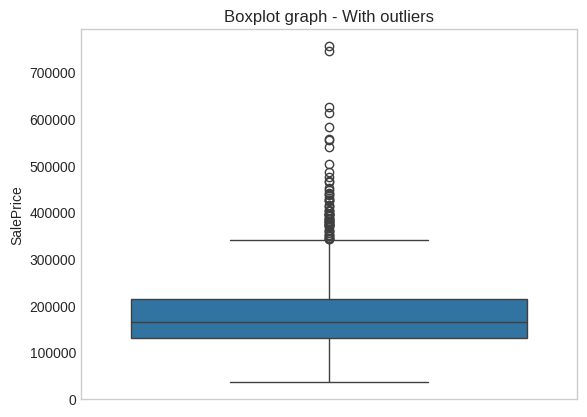

In [ ]:
# Target column chart with outliers
sns.boxplot(df["SalePrice"])
plt.title("Boxplot graph - With outliers")
plt.grid(False)
plt.show()

 **The chart reveals outliers in the target column, indicating significant deviations from the majority of data. To maintain analysis accuracy, outliers will be removed using statistical methods like the interquartile range (IQR) or z-score analysis.**

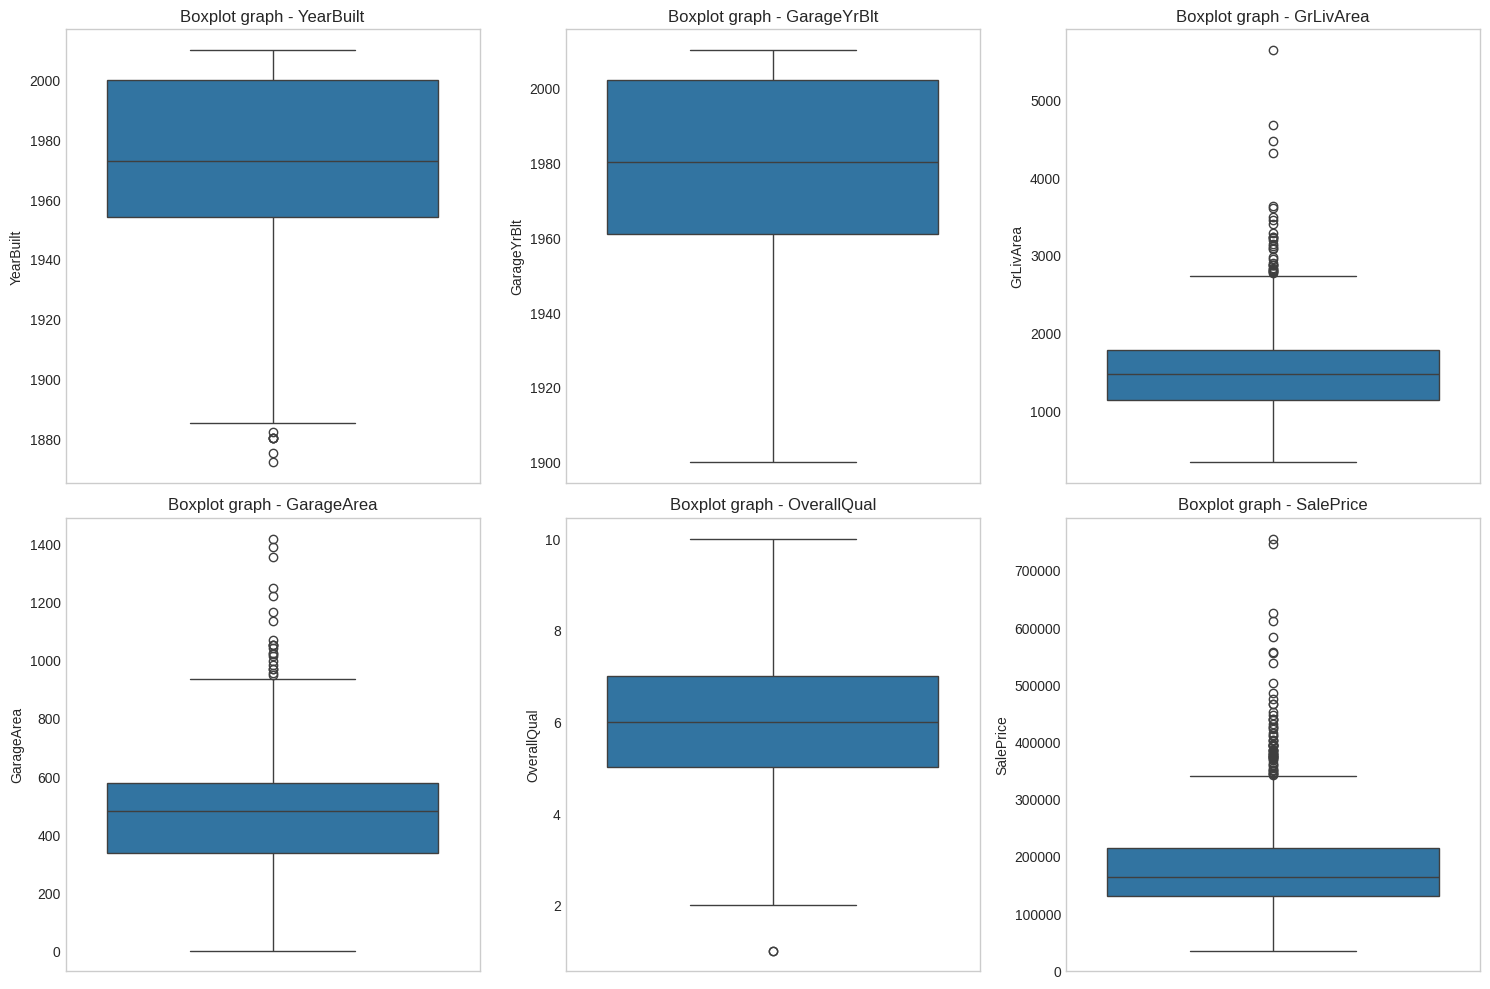

In [ ]:


# Define variables for boxplots
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(df[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

 **Performing a boxplot analysis to check for variables with outliers. The boxplot is a graphical tool that allows us to quickly identify the presence of outliers and understand the data distribution**

In [ ]:


### Outlier removal

# interest column
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Set the thresholds to consider a point as an outlier
lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

# Remove outliers
data = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

# Calculate the limits for each variable
def remove_outliers(data, column, m=3):
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    lower_bound = mean - m * std_dev
    upper_bound = mean + m * std_dev
    return lower_bound, upper_bound

# Define the variables of interest
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Set a standard deviation threshold multiplied by m
m = 3

# Calculate limits for each variable and remove outliers
for columns in columns:
    lower_bound, upper_bound = remove_outliers(data, column, m)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Reset the index
data.reset_index(drop=True, inplace=True)



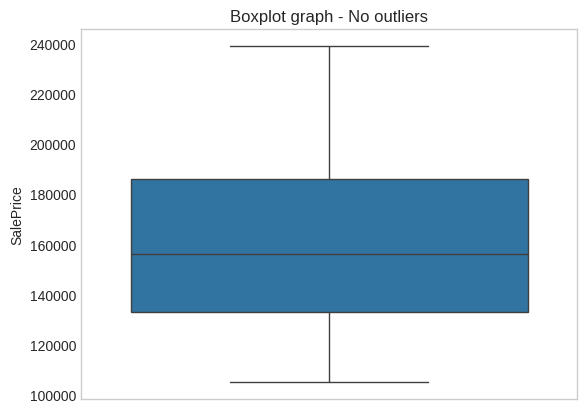

In [ ]:
# Graph without outliers applying outlier removal
sns.boxplot(data["SalePrice"])
plt.title("Boxplot graph - No outliers")
plt.grid(False)
plt.show()

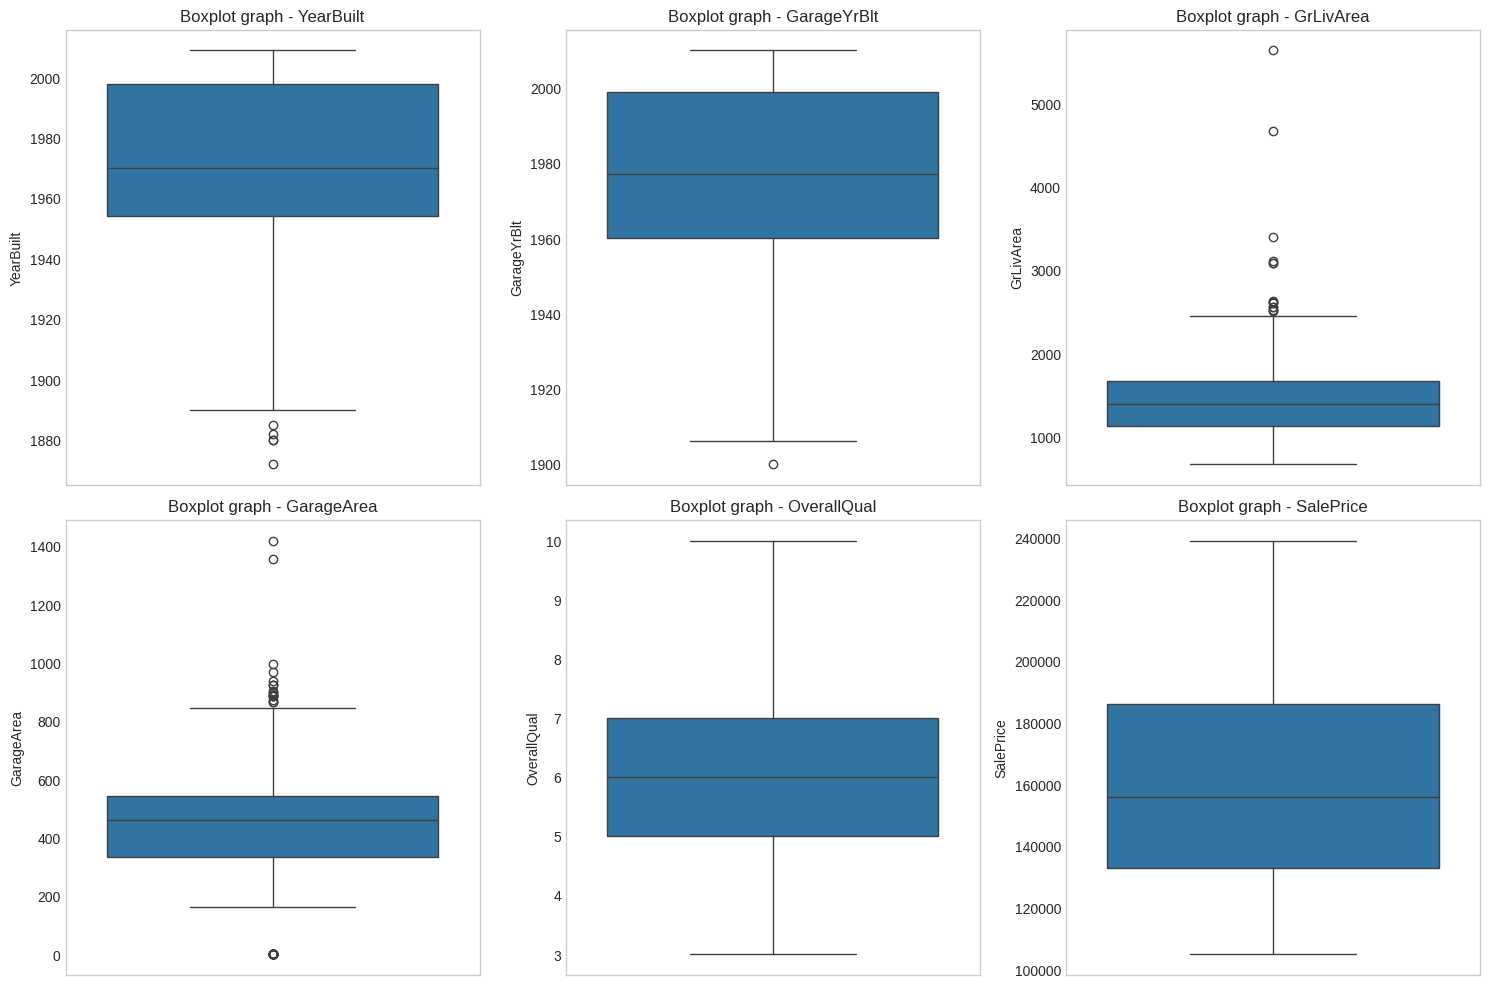

In [ ]:

# Define variables for boxplots
columns = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(data[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()



# Model Training and Testing

In [ ]:
X = df[["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual"]] # Pass a list of column names
y = df["SalePrice"]

In [ ]:
X.shape

(1460, 5)

# Feature Engineering

In [ ]:
# Importing library
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
data[label_col]=data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Viewing
Label_pre



LabelEncoder()

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,3,0,2,2006,8,0,140000
4,6,50,3,85.0,14115,1,2,0,3,0,...,0,3,2,2,700,10,2009,8,4,143000


In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing X_train rows and columns
print("Viewing X train data:", X_train.shape)

# Viewing y_train rows and columns
print("Viewing y train data:", y_train.shape)

Viewing X train data: (1168, 5)
Viewing y train data: (1168,)


In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train
imputer.fit(X_train)

# Transform both X_train and X_test
X_train_imputed = imputer.transform(X_train)

#
X_test_imputed = imputer.transform(X_test)

# **Regression Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
LR_Model = LinearRegression()
XGB_Model = XGBRegressor()
RF_Model = RandomForestRegressor()
GB_Model = GradientBoostingRegressor(random_state=42)

In [ ]:
LR_Model.fit(X_train_imputed, y_train)
XGB_Model.fit(X_train_imputed, y_train)
RF_Model.fit(X_train_imputed, y_train)
GB_Model.fit(X_train_imputed, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
predictions = LR_Model.predict(X_test_imputed)
predictions1 = XGB_Model.predict(X_test_imputed)
predictions2 = RF_Model.predict(X_test_imputed)
predictions3 = GB_Model.predict(X_test_imputed)

#caluculate the r2score
RS1 = r2_score(y_test, predictions)
RS2 = r2_score(y_test, predictions1)
RS3 = r2_score(y_test, predictions2)
RS4 = r2_score(y_test, predictions3)

print()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test, predictions, predictions1, predictions2, and predictions3 are already defined

# Model names and their corresponding predictions
models = {
    "LinearRegression": predictions,
    "XGBRegressor": predictions1,
    "RandomForestRegressor": predictions2,
    "GradientBoostingRegressor": predictions3
}

# Calculate and print R-squared scores for each model
for model_name, prediction in models.items():
    r2 = r2_score(y_test, prediction)
    print(f"{model_name}: R2 Score = {r2:.4f}")


LinearRegression: R2 Score = 0.7698
XGBRegressor: R2 Score = 0.8270
RandomForestRegressor: R2 Score = 0.8422
GradientBoostingRegressor: R2 Score = 0.8469


# **Feature Importance**

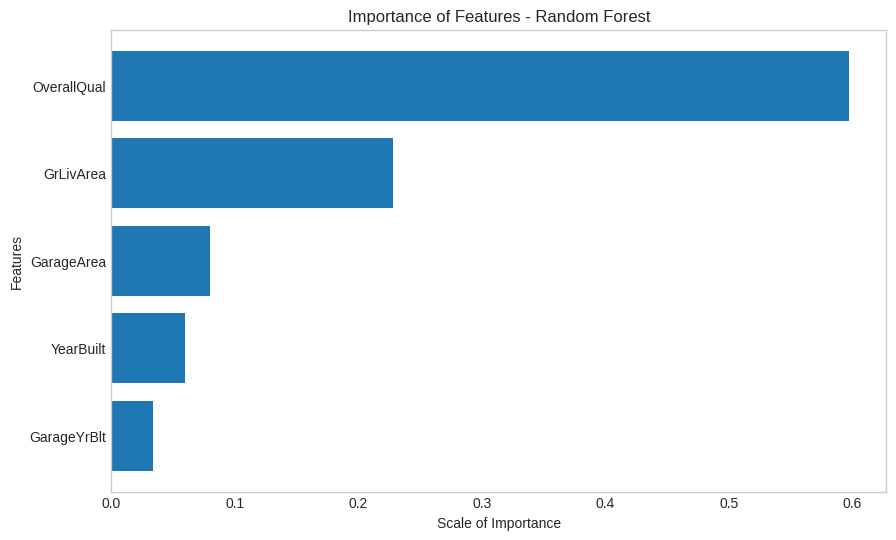

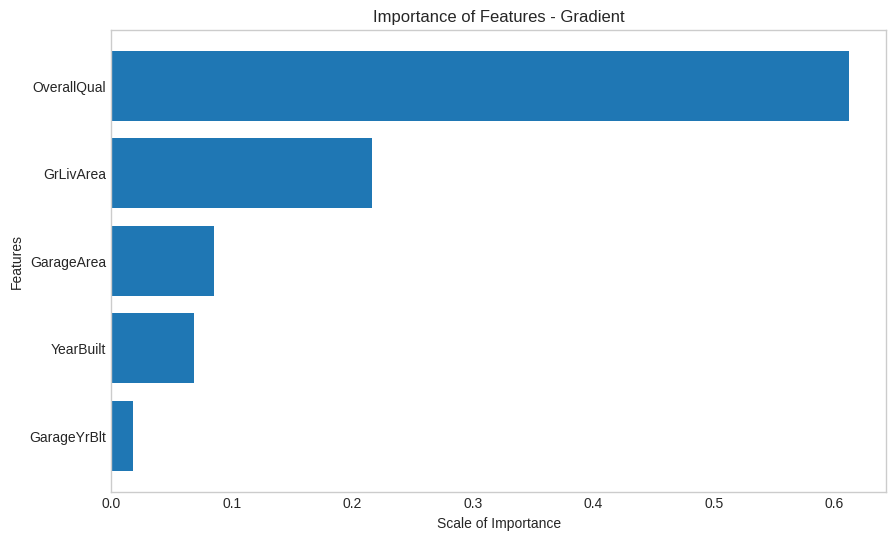

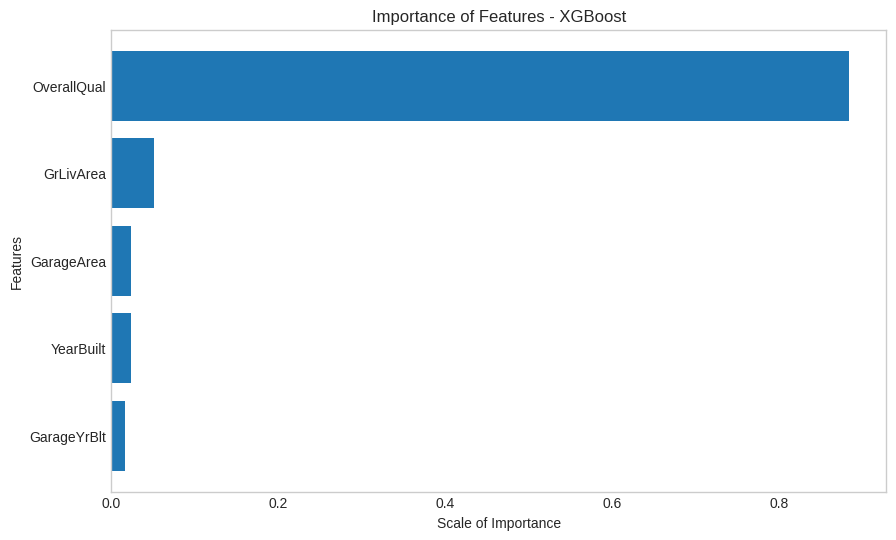

In [ ]:
# Template list
models = {
 "Linear Regression": LinearRegression(),
 "Random Forest": RandomForestRegressor(),
 "Gradient": GradientBoostingRegressor(),
 "XGBoost": XGBRegressor(),
}

# Loop to create and train models
for nome, modelo in models.items():

    # Training the model
    modelo.fit(X_train_imputed, y_train)

    # Checking if the model has a "feature_importances_" attribute or "feature_importances_" method
    if hasattr(modelo, 'feature_importances_'):

        # Obtendo as importâncias das features
        importancias = modelo.feature_importances_

        # Obtaining the importance of the features
        nomes_features = X_train.columns

        # Ordering the importance and feature names according to their importance
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Plotting the importance of features
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(nomes_features)), importancias, align='center')
        plt.yticks(range(len(nomes_features)), nomes_features)
        plt.xlabel('Scale of Importance')
        plt.ylabel('Features')
        plt.title(f'Importance of Features - {nome}')
        plt.grid(False)
        plt.show()


## **Key Observations - XGBoost model**

a). OverallQual: This feature has the highest importance by a significant margin.It suggests that the overall quality rating of the property is the most critical factor in the model's predictions.

b). GrLivArea: The second most important feature. Indicates that the above-ground living area square footage is also a crucial factor.

c). YearBuilt: The year the house was built is the third most significant feature. This implies that newer homes may be valued differently than older ones.

d). GarageArea: The garage area contributes meaningfully to the model's predictions. The size of the garage is a key factor in the property's valuation.

e). GarageYrBlt: The year the garage was built also has an impact, though less significant than the overall quality and living area. Reflects the condition or modernity of the garage.


Dominance of OverallQual: The feature "OverallQual" is far more important than any other feature, indicating that the subjective quality rating of the property greatly influences its valuation.

Square Footage and Age: Features related to the size (GrLivArea) and age (YearBuilt, GarageYrBlt) of the house are also important but to a lesser extent.

Secondary Features: Garage area and the total number of rooms above ground level have a moderate to low impact compared to other features.

## Recommendations:
**When assessing property value or building a predictive model, emphasize the quality rating of the house (OverallQual) as it plays a crucial role.Consider the living area size, the age of the property, and the garage area as secondary factors. Although features like the number of rooms above ground level are less influential, they should still be included for a comprehensive analysis.**


# **Neural Network**

In [ ]:
# Load training and test data
train_data = pd.read_csv('/content/train(1).csv')
test_data = pd.read_csv('/content/test.csv')

# Separate target and predictor variables from the training set
X_train = train_data.drop(columns=['Id', 'SalePrice'])
y_train = train_data['SalePrice']
X_test = test_data.drop(columns=['Id'])

In [ ]:
# identify numerical and categorical columns

numerical_features = X_train.select_dtypes(include=['int', 'float']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Importing the libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('imputer',
                                       SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer',
                                           SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num',
                                                numeric_transformer, numerical_features),
                                               ('cat',categorical_transformer, categorical_features)])

# Adjust the preprocessor and transform training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data (using the same preprocessor adjusted in the training data)
X_test = preprocessor.transform(X_test)

# Convert sparse matrices into dense arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

# Nueral Network - Regression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# simple regression

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

#complier
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']  )

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               36864     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47233 (184.50 KB)
Trainable params: 47233 (184.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_split=0.2,
                    batch_size=32,
                    verbose=2)


Epoch 1/500
37/37 - 2s - loss: 38815227904.0000 - mean_absolute_error: 180579.1719 - val_loss: 39900352512.0000 - val_mean_absolute_error: 182197.0312 - 2s/epoch - 57ms/step
Epoch 2/500
37/37 - 0s - loss: 38723190784.0000 - mean_absolute_error: 180335.5781 - val_loss: 39637995520.0000 - val_mean_absolute_error: 181516.2656 - 168ms/epoch - 5ms/step
Epoch 3/500
37/37 - 0s - loss: 38012579840.0000 - mean_absolute_error: 178475.3125 - val_loss: 38156046336.0000 - val_mean_absolute_error: 177643.0625 - 169ms/epoch - 5ms/step
Epoch 4/500
37/37 - 0s - loss: 35219206144.0000 - mean_absolute_error: 170932.3125 - val_loss: 33384701952.0000 - val_mean_absolute_error: 164612.3750 - 156ms/epoch - 4ms/step
Epoch 5/500
37/37 - 0s - loss: 28107114496.0000 - mean_absolute_error: 150174.1719 - val_loss: 23406790656.0000 - val_mean_absolute_error: 133509.5469 - 181ms/epoch - 5ms/step
Epoch 6/500
37/37 - 0s - loss: 16308140032.0000 - mean_absolute_error: 107837.9844 - val_loss: 10566052864.0000 - val_mean

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

# Display some predictions
for i in range(25):
    print(f'Predicted price for house {i+1}: ${predictions[i][0]:.2f}')

46/46 [==============================] - 0s 2ms/step
Predicted price for house 1: $133585.23
Predicted price for house 2: $127928.22
Predicted price for house 3: $190419.88
Predicted price for house 4: $198407.11
Predicted price for house 5: $183811.03
Predicted price for house 6: $176841.73
Predicted price for house 7: $179020.05
Predicted price for house 8: $171527.91
Predicted price for house 9: $176456.42
Predicted price for house 10: $130790.62
Predicted price for house 11: $171153.52
Predicted price for house 12: $99345.63
Predicted price for house 13: $100369.17
Predicted price for house 14: $147066.61
Predicted price for house 15: $109241.77
Predicted price for house 16: $384218.28
Predicted price for house 17: $259541.28
Predicted price for house 18: $264395.31
Predicted price for house 19: $270489.47
Predicted price for house 20: $505650.25
Predicted price for house 21: $322835.50
Predicted price for house 22: $205960.48
Predicted price for house 23: $176812.50
Predicted pric

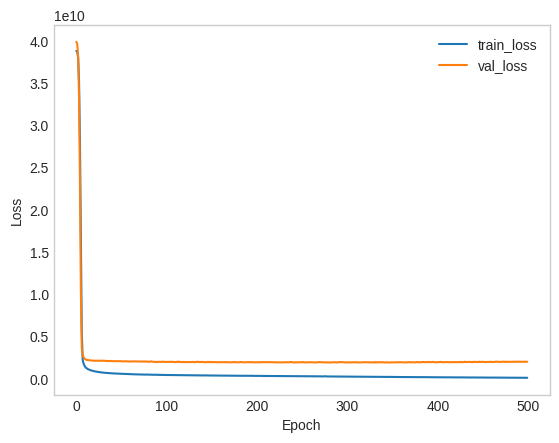

In [93]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

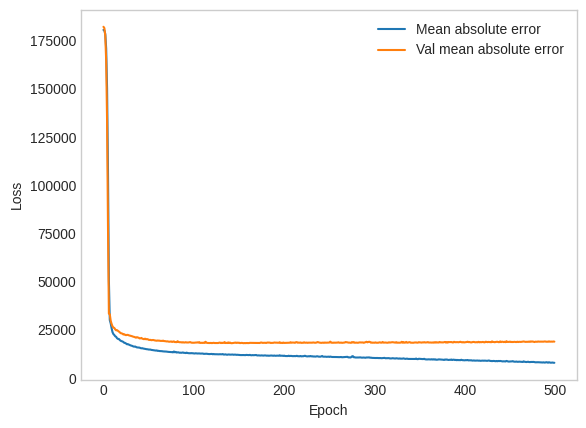

In [94]:
# Plot training history
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Val mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()



In [95]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train_RNN = r2_score(y_train, predictions_train)

print(f'Mean Absolute Error (Train): {mae_train}')
print(f'R-squared (Train): {r2_train_RNN}')

46/46 [==============================] - 0s 2ms/step
Mean Absolute Error (Train): 10061.435033176369
R-squared (Train): 0.9169872182215529


## **Conclusion**

### Positive correlations were observed, such as:

  OverallQual vs. SalePrice: The overall quality of materials and finishing is positively correlated with the sale price.

  GrLivArea vs. SalePrice: The above-ground living area also shows a positive correlation, indicating that homes with more living space tend to have higher prices.

  GarageArea vs. SalePrice: The garage area has a positive relationship with the sale price.

  YearBuilt vs. SalePrice: The year built is also positively correlated with the sale price.

  GarageYearBuilt vs. SalePrice: The Garage year built has a positive correlation with the sale price.
